Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Data Collection & Processing

In [2]:
# loading the data from sklearn
breast_cancer_dataset = pd.read_csv('data.csv')

In [3]:
print(breast_cancer_dataset)

           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean   
0      842302         M        17.99         10.38          122.80     1001.0  \
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

In [4]:
# loading the data to a data frame
data_frame = pd.read_csv('data.csv')

In [5]:
# print the first 5 rows of the dataframe
data_frame.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:

data_frame = data_frame.rename(columns={'diagnosis': 'label'})


1 --> Benign

0 --> Malignant

In [7]:
data_frame['label'] = data_frame['label'].map({'B': 1, 'M': 0})

In [8]:
# print last 5 rows of the dataframe
data_frame.tail()

,id,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,0,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,0,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,0,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,1,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [9]:
# number of rows and columns in the dataset
data_frame.shape

(569, 33)

In [10]:
# getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   label                    569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [11]:
# checking for missing values
data_frame.isnull().sum()

id                           0
label                        0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
# statistical measures about the data
data_frame.describe()

,id,label,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.627417,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,1.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [13]:
# checking the distribution of Target Varibale
data_frame['label'].value_counts()

label
1    357
0    212
Name: count, dtype: int64

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

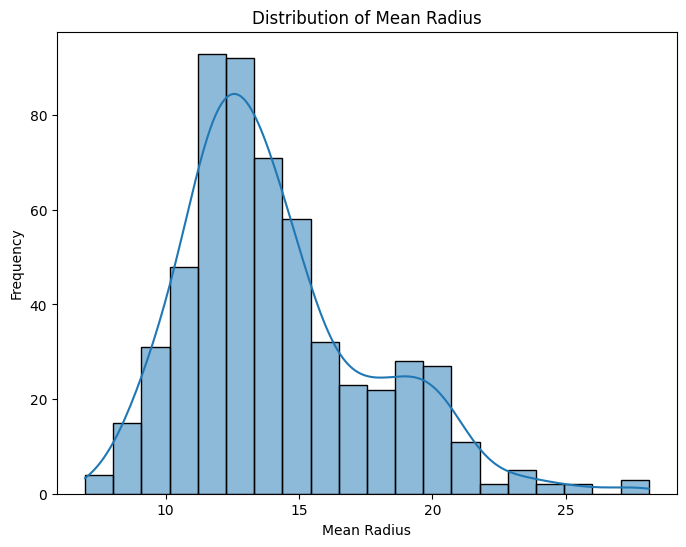

In [15]:
# Plot a histogram of the 'mean radius' feature
plt.figure(figsize=(8, 6))
sns.histplot(data_frame['radius_mean'], bins=20, kde=True)
plt.title('Distribution of Mean Radius')
plt.xlabel('Mean Radius')
plt.ylabel('Frequency')
plt.show()

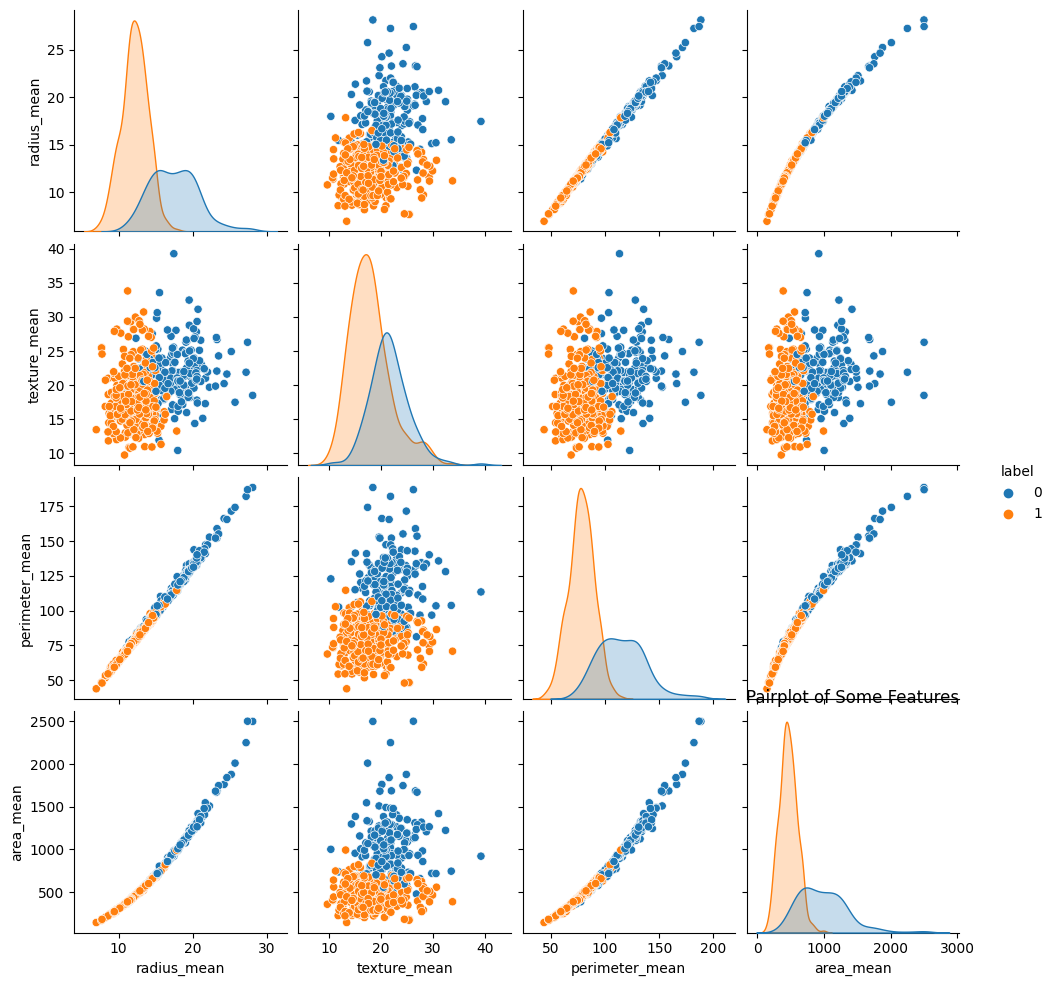

In [16]:
# Plot a pairplot to visualize relationships between some features
sns.pairplot(data_frame[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'label']], hue='label')
plt.title('Pairplot of Some Features')
plt.show()


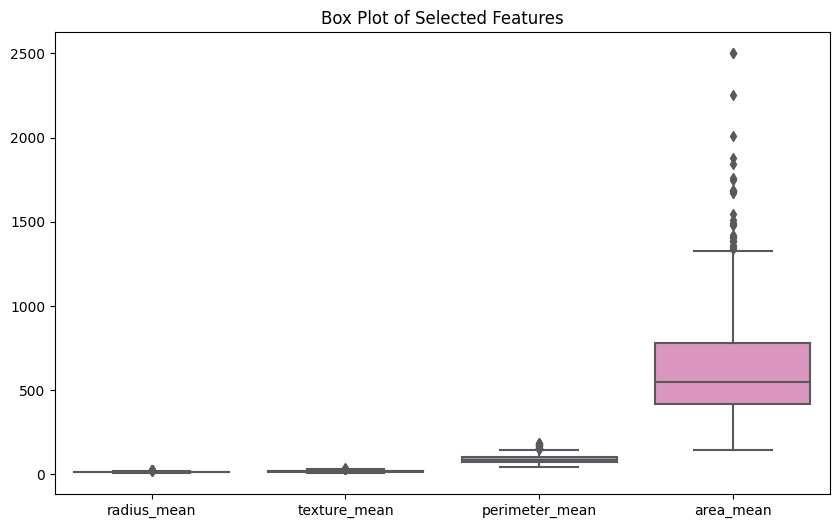

In [17]:
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_frame[selected_features], palette="Set2")
plt.title('Box Plot of Selected Features')
plt.show()

Separating the features and target

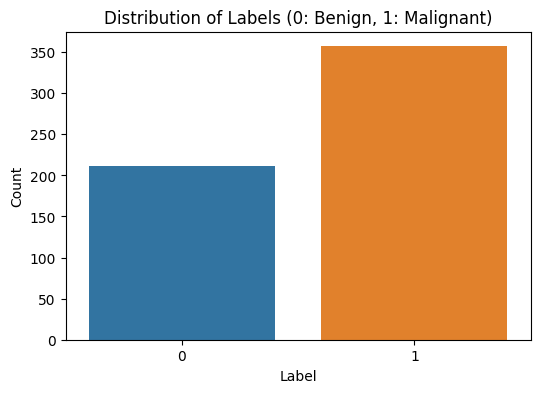

In [18]:
# Countplot of the target variable 'label'
plt.figure(figsize=(6, 4))
sns.countplot(data=data_frame, x='label')
plt.title('Distribution of Labels (0: Benign, 1: Malignant)')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

<Axes: >

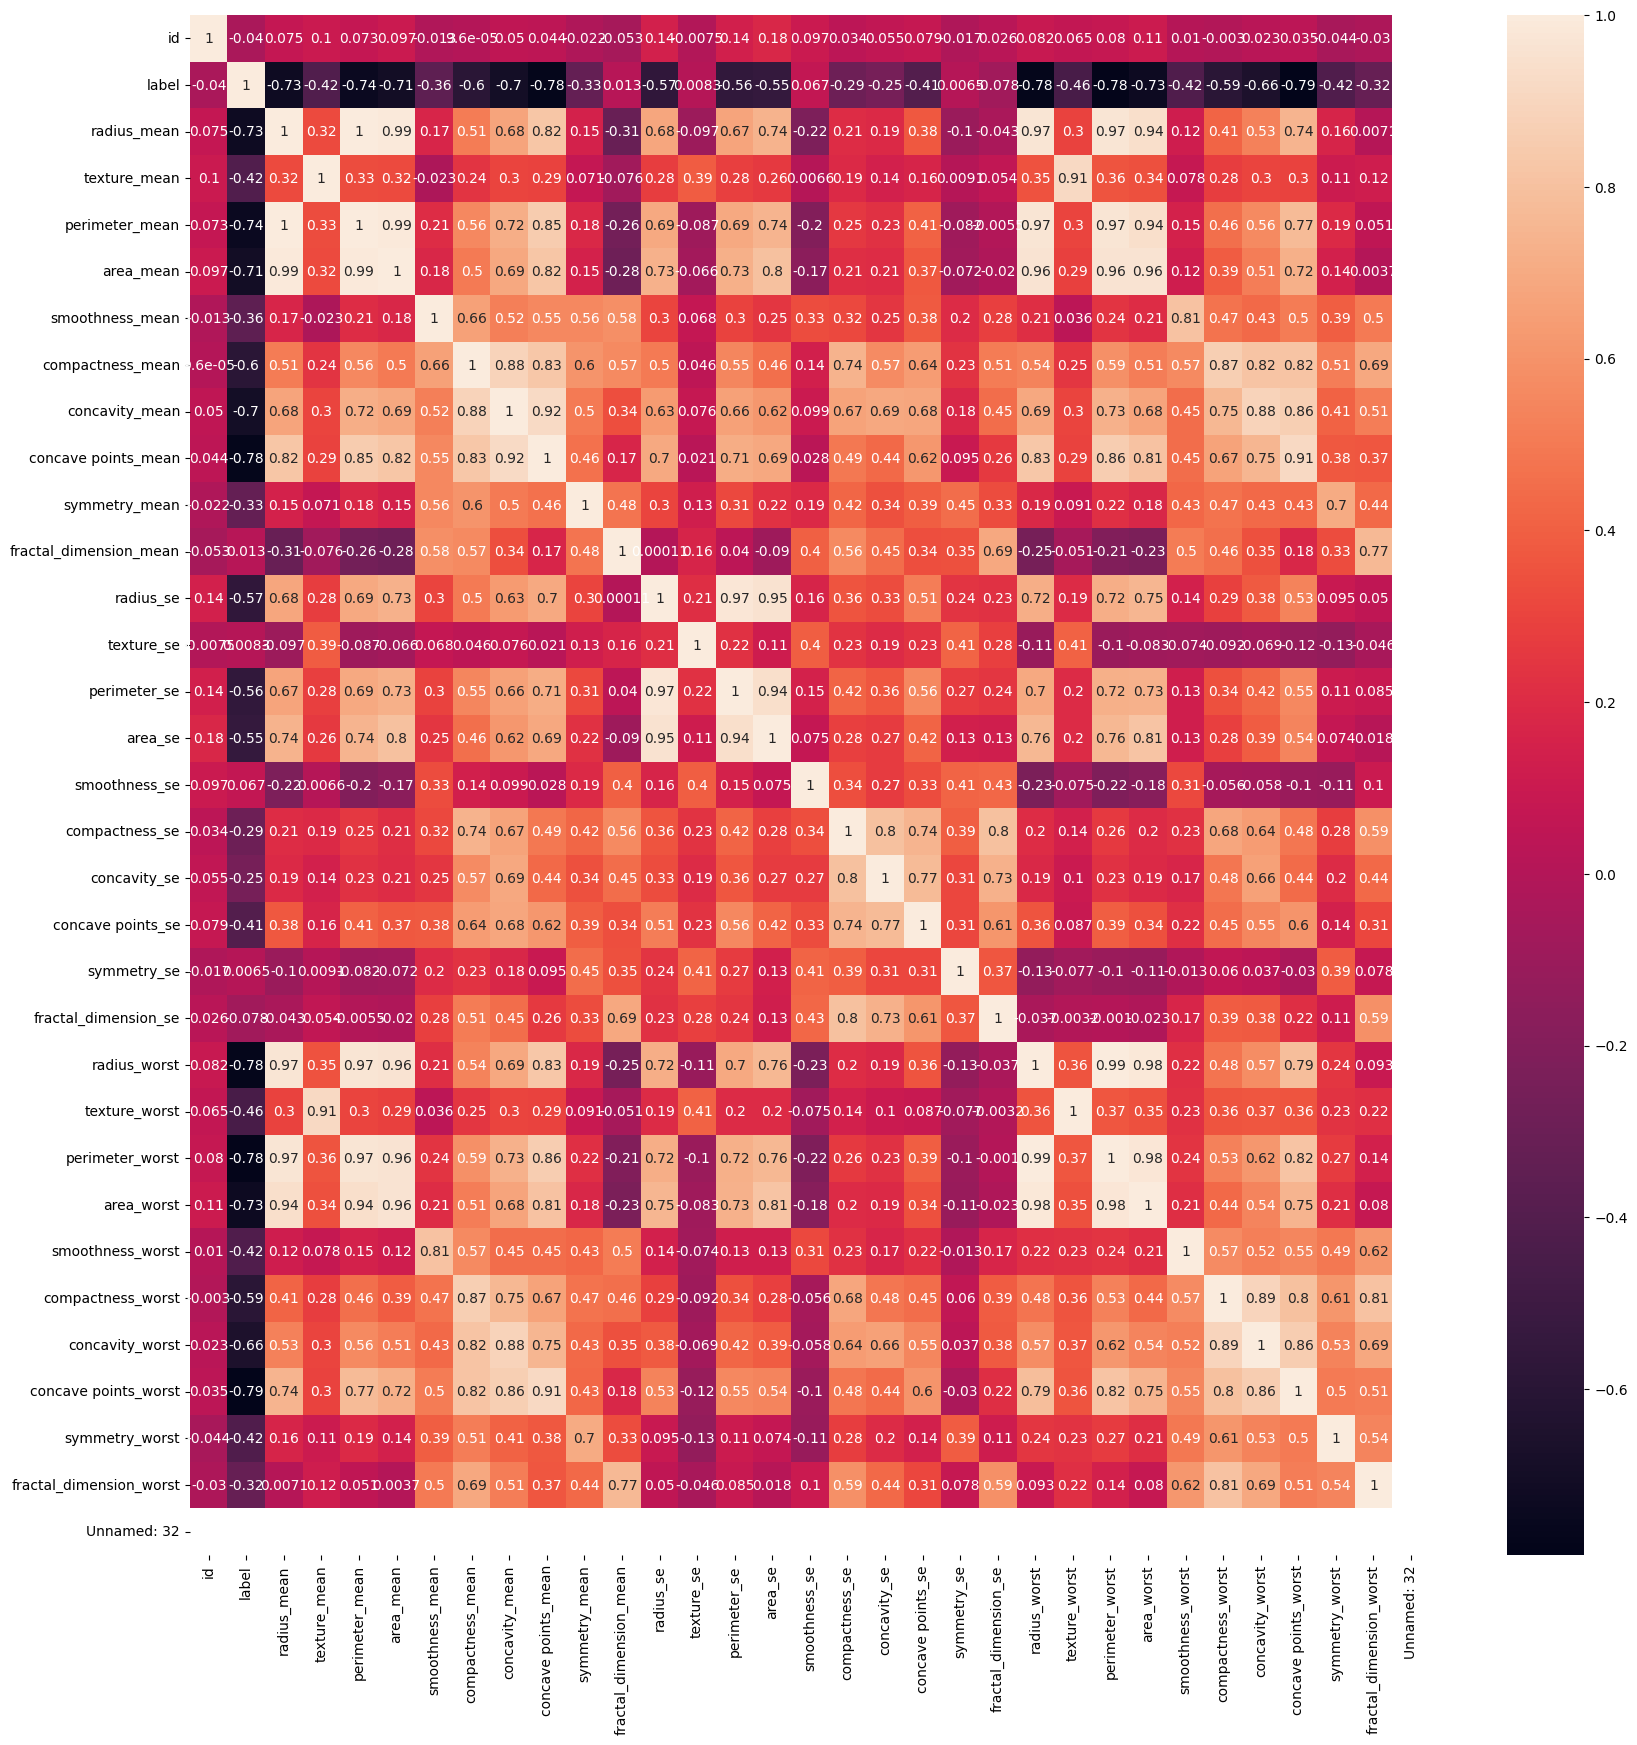

In [37]:
fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data_frame.corr(),annot=True,ax=ax)

In [19]:
X = data_frame.drop(columns=['id','label', 'Unnamed: 32'], axis=1)
Y = data_frame['label']

In [20]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean   
0          17.99         10.38          122.80     1001.0          0.11840  \
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [21]:
print(Y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int64


Splitting the data into training data & Testing data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [24]:
# Import necessary libraries
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [25]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Train Accuracy: 0.989010989010989
Test Accuracy: 0.9736842105263158
Logistic Regression:
Accuracy: 0.9736842105263158
Classification Report
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.99      0.97      0.98        69

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



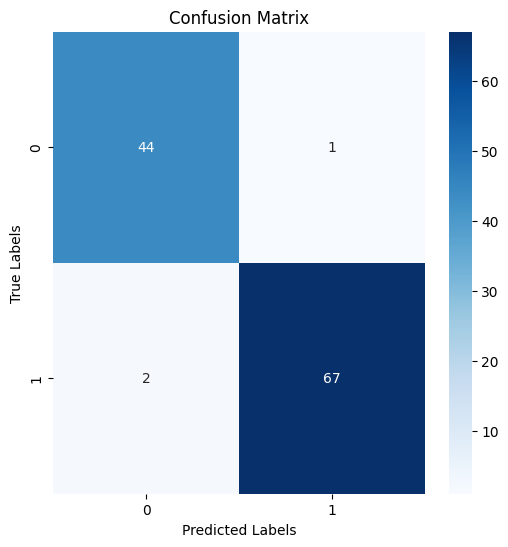

In [26]:

# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train Logistic Regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)

# Predictions on training and test sets
train_predictions = logistic_reg.predict(X_train)
test_predictions = logistic_reg.predict(X_test)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print train accuracy and test accuracy
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred))

# Print classification report for test set
print("Classification Report")
print(classification_report(y_test, test_predictions))

# Plot confusion matrix for test set
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


Train Accuracy: 0.9758241758241758
Test Accuracy: 0.9736842105263158
KNN Accuracy: 0.9736842105263158
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        45
           1       0.96      1.00      0.98        69

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



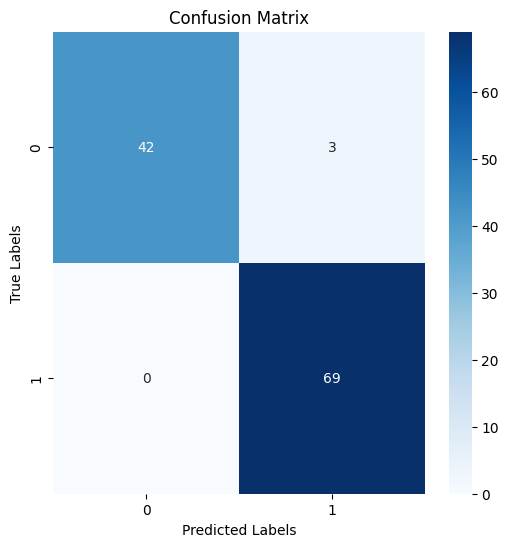

In [27]:
# k-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust the 'n_neighbors' parameter
knn.fit(X_train, y_train)

# Predictions on training and test sets
train_predictions = knn.predict(X_train)
test_predictions = knn.predict(X_test)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print train accuracy and test accuracy
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Overall accuracy
KNN_accuracy = accuracy_score(y_test, test_predictions)
print("KNN Accuracy:", KNN_accuracy)

# Print classification report for test set
print("Classification Report")
print(classification_report(y_test, test_predictions))

# Plot confusion matrix for test set
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Train Accuracy: 0.9296703296703297
Test Accuracy: 0.9385964912280702
navie_bayes_accuracy: 0.9385964912280702
Classification Report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92        45
           1       0.96      0.94      0.95        69

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighted avg       0.94      0.94      0.94       114



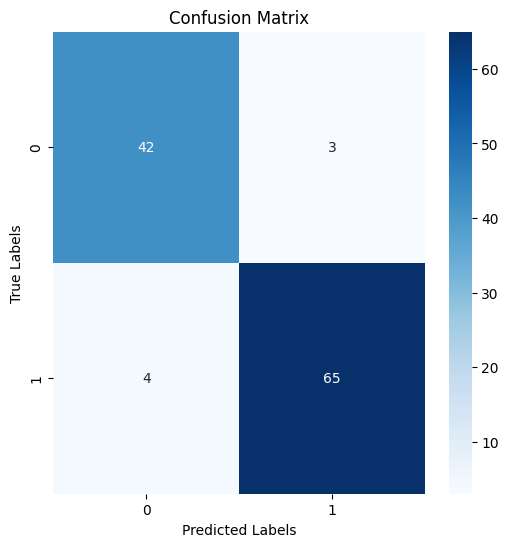

In [28]:
# Naive Bayes
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

# Predictions on training and test sets
train_predictions = naive_bayes.predict(X_train)
test_predictions = naive_bayes.predict(X_test)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print train accuracy and test accuracy
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Overall accuracy
navie_bayes_accuracy = accuracy_score(y_test, test_predictions)
print("navie_bayes_accuracy:", navie_bayes_accuracy)

# Print classification report for test set
print("Classification Report")
print(classification_report(y_test, test_predictions))

# Plot confusion matrix for test set
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Train Accuracy: 0.9934065934065934
Test Accuracy: 0.956140350877193
svm Accuracy: 0.956140350877193
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        45
           1       0.98      0.94      0.96        69

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



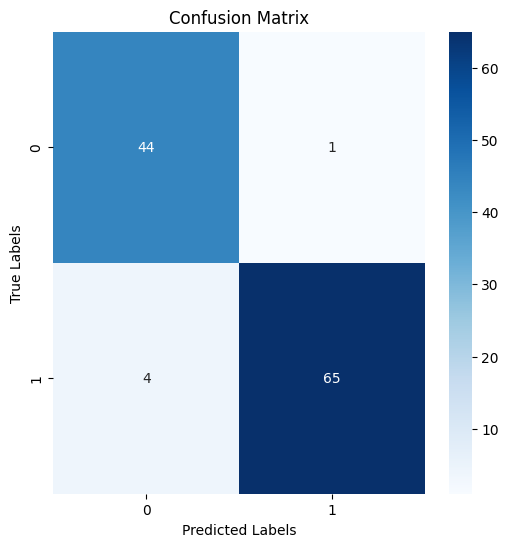

In [29]:
# Support Vector Machine
svm = SVC(kernel='linear') 
svm.fit(X_train, y_train)

# Predictions on training and test sets
train_predictions = svm.predict(X_train)
test_predictions = svm.predict(X_test)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print train accuracy and test accuracy
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

svm_accuracy = accuracy_score(y_test, test_predictions)
print("svm Accuracy:", svm_accuracy)

# Print classification report for test set
print("Classification Report")
print(classification_report(y_test, test_predictions))

# Plot confusion matrix for test set
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Train Accuracy: 1.0
Test Accuracy: 0.956140350877193
Random Forest Accuracy: 0.956140350877193
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        45
           1       0.98      0.94      0.96        69

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



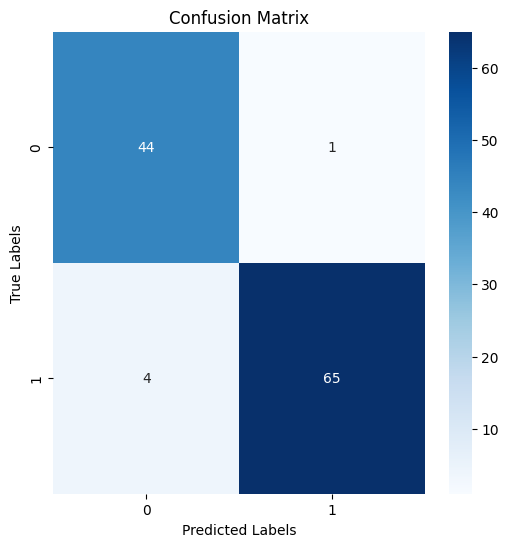

In [30]:

random_forest = RandomForestClassifier(n_estimators=100)  # You can adjust the 'n_estimators' parameter
random_forest.fit(X_train, y_train)

# Predictions on training and test sets
train_predictions = random_forest.predict(X_train)
test_predictions = random_forest.predict(X_test)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print train accuracy and test accuracy
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Random Forest accuracy
random_forest_accuracy = accuracy_score(y_test, test_predictions)
print("Random Forest Accuracy:", random_forest_accuracy)

# Print classification report for test set
print("Classification Report")
print(classification_report(y_test, test_predictions))

# Plot confusion matrix for test set
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Train Accuracy: 1.0
Test Accuracy: 0.9210526315789473
Decision Tree Accuracy: 0.9210526315789473
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.96      0.91        45
           1       0.97      0.90      0.93        69

    accuracy                           0.92       114
   macro avg       0.91      0.93      0.92       114
weighted avg       0.93      0.92      0.92       114



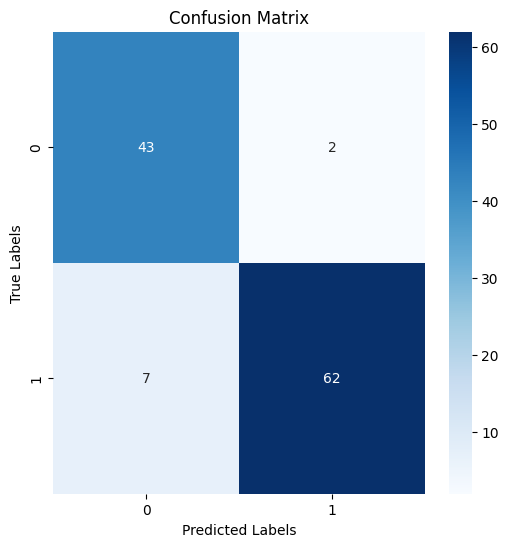

In [31]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Predictions on training and test sets
train_predictions = decision_tree.predict(X_train)
test_predictions = decision_tree.predict(X_test)

# Calculate accuracy for training and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

# Print train accuracy and test accuracy
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Decision Tree accuracy
decision_tree_accuracy = accuracy_score(y_test, test_predictions)
print("Decision Tree Accuracy:", decision_tree_accuracy)

# Print classification report for test set
print("Classification Report")
print(classification_report(y_test, test_predictions))

# Plot confusion matrix for test set
plt.figure(figsize=(6, 6))
sns.heatmap(confusion_matrix(y_test, test_predictions), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [32]:
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "k-NN": KNeighborsClassifier(n_neighbors=5),
    "Navie Bayes": GaussianNB(),
    "SVM": SVC(kernel='linear'),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "Decision Tree": DecisionTreeClassifier()
}

results = []

# Evaluate classifiers
for clf_name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results.append({
        "Classifier": clf_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

# Create a pandas DataFrame
df = pd.DataFrame(results)

# Display the results in tabular format
print(df)

            Classifier  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.973684   0.985294  0.971014  0.978102
1                 k-NN  0.973684   0.958333  1.000000  0.978723
2          Navie Bayes  0.938596   0.955882  0.942029  0.948905
3                  SVM  0.956140   0.984848  0.942029  0.962963
4        Random Forest  0.938596   0.955882  0.942029  0.948905
5        Decision Tree  0.921053   0.968750  0.898551  0.932331


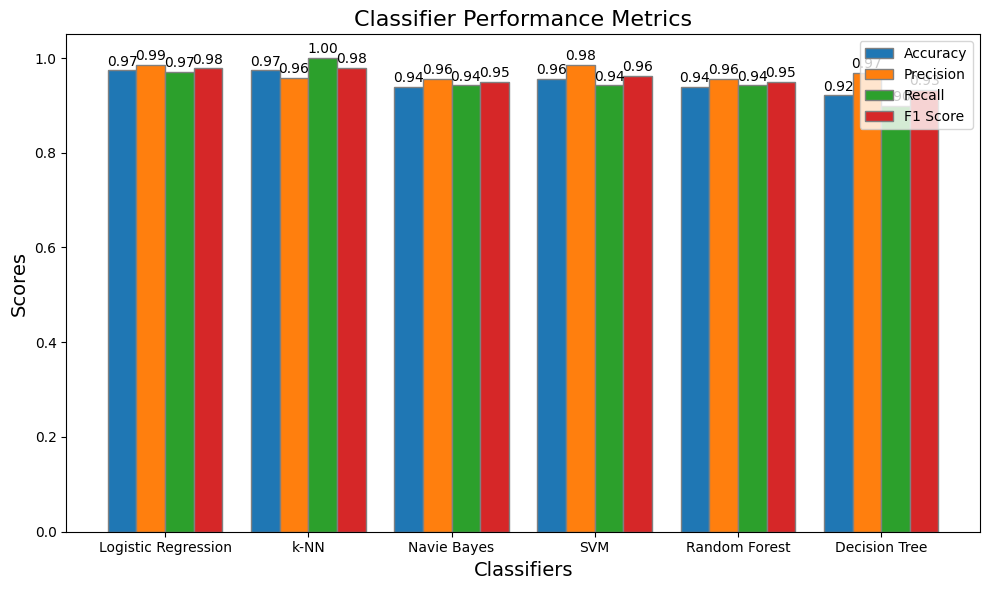

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'results' is your data
df = pd.DataFrame(results)

# Bar width
bar_width = 0.2

# Bar positions
r1 = range(len(df))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(r1, df['Accuracy'], width=bar_width, edgecolor='grey', label='Accuracy')
plt.bar(r2, df['Precision'], width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r3, df['Recall'], width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r4, df['F1 Score'], width=bar_width, edgecolor='grey', label='F1 Score')

# Adding the values on top of each bar
for r, acc, prec, recall, f1 in zip(r1, df['Accuracy'], df['Precision'], df['Recall'], df['F1 Score']):
    plt.text(r, acc + 0.01, f'{acc:.2f}', ha='center')
    plt.text(r + bar_width, prec + 0.01, f'{prec:.2f}', ha='center')
    plt.text(r + 2 * bar_width, recall + 0.01, f'{recall:.2f}', ha='center')
    plt.text(r + 3 * bar_width, f1 + 0.01, f'{f1:.2f}', ha='center')

# Set labels and title
plt.xlabel('Classifiers', fontsize=14)
plt.ylabel('Scores', fontsize=14)
plt.title('Classifier Performance Metrics', fontsize=16)
plt.xticks([r + 1.5 * bar_width for r in range(len(df))], df['Classifier'])
plt.legend()
plt.tight_layout()  # Add tight_layout here
plt.show()


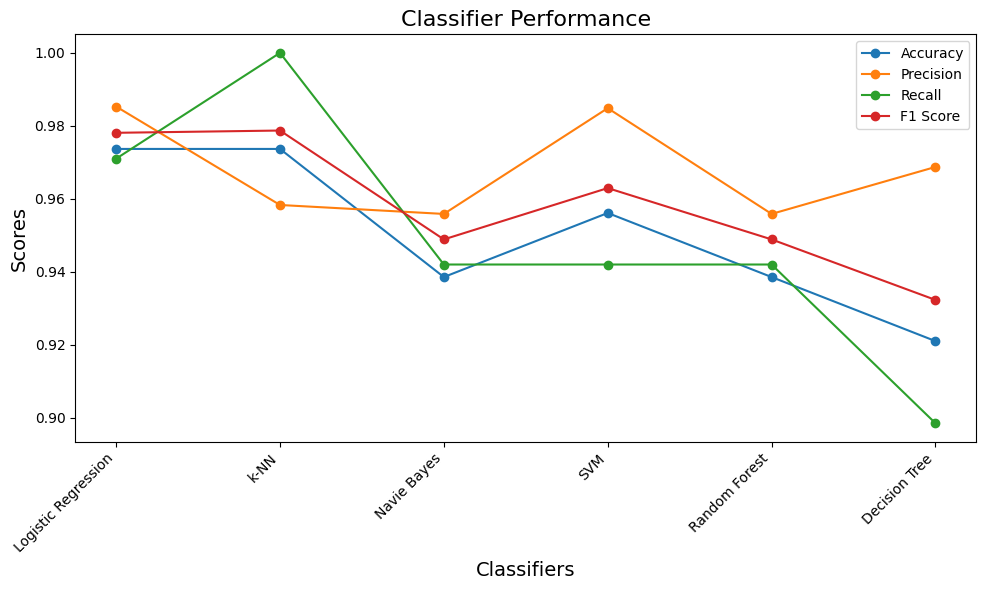

In [34]:
df = pd.DataFrame(results)

# Plotting the evaluation metrics in a line chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot lines for each metric
ax.plot(df['Classifier'], df['Accuracy'], marker='o', label='Accuracy')
ax.plot(df['Classifier'], df['Precision'], marker='o', label='Precision')
ax.plot(df['Classifier'], df['Recall'], marker='o', label='Recall')
ax.plot(df['Classifier'], df['F1 Score'], marker='o', label='F1 Score')

# Set labels, title, and legend
ax.set_xlabel('Classifiers', fontsize=14)
ax.set_ylabel('Scores', fontsize=14)
ax.set_title('Classifier Performance', fontsize=16)

# Set positions of the ticks and their labels
ax.set_xticks(range(len(df['Classifier'])))
ax.set_xticklabels(df['Classifier'], rotation=45, ha='right')

ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [35]:
input_data = (1.1086847681759506, 0.29397886169899934, 1.0743624847185296, 0.9629511383188009, 0.5314627815983674, 0.5169230561010729, 0.4321094524327457, 1.0438543904892972, 0.6933335368991518, -0.3010917526977056, 0.20127076319392875, -0.627547971165941, 0.11984243302335597, 0.22286103884512312, 0.08215546853836267, 0.14120258308324965, -0.22402133719677425, 0.5431210697816103, -0.7923545264936476, -0.16952782413226578, 1.0328165963303884, -0.061003811472549345, 0.9542360556906962, 0.8671750553708882, 0.7054287304097268, 0.7720701994354482, 0.29374464034062675, 1.282178502432553, 0.2743546669738254, 0.06552763737863151)
# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = logistic_reg.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The Breast cancer is Malignant')

else:
  print('The Breast Cancer is Benign')

[0]
The Breast cancer is Malignant


In [36]:
import joblib

# Save the trained model to a file
# Save Logistic Regression model
joblib.dump(logistic_reg, 'logistic_reg_model.pkl')

# Save K-Nearest Neighbors model
joblib.dump(knn, 'knn_model.pkl')

# Save Naive Bayes model
joblib.dump(naive_bayes, 'naive_bayes_model.pkl')

# Save Support Vector Machine model
joblib.dump(svm, 'svm_model.pkl')

# Save Random Forest model
joblib.dump(random_forest, 'random_forest_model.pkl')

#save decision tree
joblib.dump(decision_tree, 'decision_tree_model.pkl')

['decision_tree_model.pkl']